<a href="https://colab.research.google.com/github/i-r-a/CSE_574/blob/master/PROJ_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import io
labels = pd.read_csv('drive/My Drive/flowers/tes.csv')

In [0]:
!ls 'drive/My Drive/flowers'

In [0]:
labels.head()

,file,species
0,11447,Bird_of_paradise
1,7946,Bird_of_paradise
2,15420,Bird_of_paradise
3,5229,Bird_of_paradise
4,3217,Balloon_Flower


In [0]:
def get_image(row_id, root="drive/My Drive/flowers/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

In [0]:
paradise = labels[labels.species == 'Bird_of_paradise'].file[1]

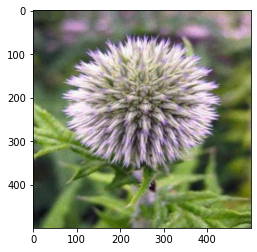

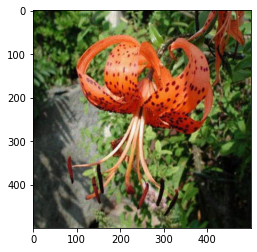

In [6]:
plt.imshow(get_image(paradise))
plt.show()

balloon = labels[labels.species == 'Balloon_Flower'].file[4]
plt.imshow(get_image(balloon))
plt.show()

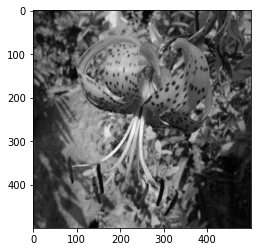

In [7]:
bop = get_image(paradise)
bal = get_image(balloon)

g_bal = rgb2grey(bal)
plt.imshow(g_bal, cmap=mpl.cm.gray)

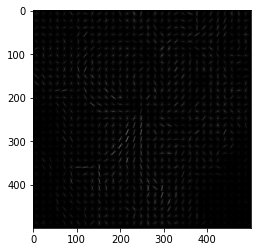

In [8]:
hog_features, hog_image = hog(g_bal,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [9]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack(color_features)
    return flat_features

bal_features = create_features(bal)

print(bal_features)

[18 41 15 ...  9  8 13]


In [0]:
labels.file

0      11447
1       7946
2      15420
3       5229
4       3217
       ...  
199    11385
200    11420
201    15129
202     9635
203    17518
Name: file, Length: 204, dtype: int64

In [0]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.file:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)

In [0]:
ss = StandardScaler()
# run this on our feature matrix
fleur_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
fleur_pca = ss.fit_transform(fleur_stand)

In [26]:
X = pd.DataFrame(fleur_pca)
y = pd.Series(labels.species.values)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=42)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

Bird_of_paradise    71
Balloon_Flower      71
dtype: int64

In [27]:
svm = SVC(kernel='linear', C= float('inf'),probability=True)

svm.fit(X_train, y_train)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  1.0


LinearSVM classifier / SGDClassifier

In [0]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [30]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [31]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [70]:
logReg = LogisticRegression().fit(X_train,y_train)
logPred = logReg.predict(X_test)
accuracy_score(logPred,y_test)

1.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


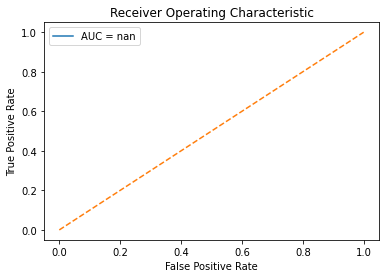

In [0]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');